In [3]:
import numpy as np
import pandas as pd

### missing value

In [4]:
np.random.randn(5,5)

array([[-0.80352579,  0.87902409,  1.63500056,  0.46776606,  2.13612292],
       [-1.72038119, -0.15156688,  0.45670191, -0.91836659,  0.08680153],
       [-1.11321073,  0.37355125, -0.1439801 ,  1.95503252, -1.35606287],
       [ 0.40893692, -0.34019101, -1.09177182, -0.74596614,  0.16816824],
       [ 0.51213284, -1.43966197, -0.27972986, -1.27342594,  0.49550575]])

In [5]:
pd.DataFrame(np.random.randn(5,5))

,0,1,2,3,4
0,-0.940078,0.539889,-1.146996,-0.657045,-0.675010
1,0.852442,0.636934,0.210443,-1.538295,-1.099238
2,0.802579,0.588773,0.981256,0.958587,0.549413
3,-0.283442,-1.994982,2.326827,-0.731390,0.867068
4,-0.163827,-0.409438,-1.384506,-0.455060,-0.824851


In [6]:
df = pd.DataFrame(np.random.randn(5,5), index = ['a', 'b', 'c', 'd', 'e'], columns = ['one', 'two', 'three', 'four', 'five'])
df

,one,two,three,four,five
a,0.028261,-0.944032,1.170432,-1.445913,-0.064185
b,0.481331,-1.724714,-0.446824,1.401163,-1.845175
c,-0.162842,0.585355,0.697795,-1.620666,2.244361
d,-0.589113,1.275238,0.165412,-1.374531,-1.607673
e,0.777117,-2.259500,-0.749435,-0.778322,-0.159234


In [7]:
df.iloc[1:3, 1] = np.nan
df.iloc[2, 2:4] = np.nan
df

,one,two,three,four,five
a,0.028261,-0.944032,1.170432,-1.445913,-0.064185
b,0.481331,NaN,-0.446824,1.401163,-1.845175
c,-0.162842,NaN,NaN,NaN,2.244361
d,-0.589113,1.275238,0.165412,-1.374531,-1.607673
e,0.777117,-2.259500,-0.749435,-0.778322,-0.159234


In [8]:
# Nan, NaN, nan..  처리 방식

# 0. nan 값을 탐지.. => isnull(), isna()
# 1. nan 값을 포함한 row 또는 column을 삭제  => drop()
# 2. nan 값을 다른 값으로 채우는 방법  => fillna()


In [9]:
df.isnull()     # nan이면 True

,one,two,three,four,five
a,False,False,False,False,False
b,False,True,False,False,False
c,False,True,True,True,False
d,False,False,False,False,False
e,False,False,False,False,False


In [10]:
df.isnull().sum()  # df에 함수를 적용하면 기본 axis = 0(세로방향)

one      0
two      2
three    1
four     1
five     0
dtype: int64

In [11]:
df.isnull().sum().sum()

4

In [12]:
df.isnull().sum(axis =1)

a    0
b    1
c    3
d    0
e    0
dtype: int64

In [13]:
# dropna()

In [14]:
df.dropna()   # 기본으로 NaN값이 있는 row를 삭제

,one,two,three,four,five
a,0.028261,-0.944032,1.170432,-1.445913,-0.064185
d,-0.589113,1.275238,0.165412,-1.374531,-1.607673
e,0.777117,-2.259500,-0.749435,-0.778322,-0.159234


In [15]:
df.dropna(axis = 1)   # Nan값이 있는 column 삭제

,one,five
a,0.028261,-0.064185
b,0.481331,-1.845175
c,-0.162842,2.244361
d,-0.589113,-1.607673
e,0.777117,-0.159234


In [16]:
df.dropna(how = 'all')    # 전체 데이터가 nan인 경우 삭제

,one,two,three,four,five
a,0.028261,-0.944032,1.170432,-1.445913,-0.064185
b,0.481331,NaN,-0.446824,1.401163,-1.845175
c,-0.162842,NaN,NaN,NaN,2.244361
d,-0.589113,1.275238,0.165412,-1.374531,-1.607673
e,0.777117,-2.259500,-0.749435,-0.778322,-0.159234


In [17]:
df.dropna(thresh = 3)    # 데이터가 3개 이상이면 삭제하지 마라

,one,two,three,four,five
a,0.028261,-0.944032,1.170432,-1.445913,-0.064185
b,0.481331,NaN,-0.446824,1.401163,-1.845175
d,-0.589113,1.275238,0.165412,-1.374531,-1.607673
e,0.777117,-2.259500,-0.749435,-0.778322,-0.159234


In [18]:
# fillna()

In [19]:
df.fillna('가')

,one,two,three,four,five
a,0.028261,-0.944032,1.170432,-1.445913,-0.064185
b,0.481331,가,-0.446824,1.401163,-1.845175
c,-0.162842,가,가,가,2.244361
d,-0.589113,1.275238,0.165412,-1.374531,-1.607673
e,0.777117,-2.2595,-0.749435,-0.778322,-0.159234


In [20]:
df.fillna(method = 'ffill')     # 앞의 값으로 채움

,one,two,three,four,five
a,0.028261,-0.944032,1.170432,-1.445913,-0.064185
b,0.481331,-0.944032,-0.446824,1.401163,-1.845175
c,-0.162842,-0.944032,-0.446824,1.401163,2.244361
d,-0.589113,1.275238,0.165412,-1.374531,-1.607673
e,0.777117,-2.259500,-0.749435,-0.778322,-0.159234


In [21]:
df.fillna(method = 'bfill')      # 뒤의 값으로 채움

,one,two,three,four,five
a,0.028261,-0.944032,1.170432,-1.445913,-0.064185
b,0.481331,1.275238,-0.446824,1.401163,-1.845175
c,-0.162842,1.275238,0.165412,-1.374531,2.244361
d,-0.589113,1.275238,0.165412,-1.374531,-1.607673
e,0.777117,-2.259500,-0.749435,-0.778322,-0.159234


In [22]:
df.fillna(df.mean())

,one,two,three,four,five
a,0.028261,-0.944032,1.170432,-1.445913,-0.064185
b,0.481331,-0.642765,-0.446824,1.401163,-1.845175
c,-0.162842,-0.642765,0.034896,-0.549401,2.244361
d,-0.589113,1.275238,0.165412,-1.374531,-1.607673
e,0.777117,-2.259500,-0.749435,-0.778322,-0.159234


In [23]:
df.interpolate()

,one,two,three,four,five
a,0.028261,-0.944032,1.170432,-1.445913,-0.064185
b,0.481331,-0.204275,-0.446824,1.401163,-1.845175
c,-0.162842,0.535481,-0.140706,0.013316,2.244361
d,-0.589113,1.275238,0.165412,-1.374531,-1.607673
e,0.777117,-2.259500,-0.749435,-0.778322,-0.159234


### groupby
* 특정 기준값으로 동질적인 데이터를 묶는 방법

In [24]:
data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'Giant', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}

df = pd.DataFrame(data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Giant,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [25]:
df.head()

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741


In [26]:
# df.groupby('Team') - 데이터를 묶는다 => groups
# ['Point'].mean() - group의 값을 어떤 값으로 표현

df.groupby('Team')['Points'].mean()

Team
Devils    768.000000
Giant     812.000000
Kings     761.666667
Riders    762.250000
Royals    752.500000
Name: Points, dtype: float64

In [27]:
# Team별로 가장 좋은 ranking을 뽑는다

df.groupby('Team')['Rank'].min()

Team
Devils    2
Giant     4
Kings     1
Riders    1
Royals    1
Name: Rank, dtype: int64

In [28]:
# 연도별 최고 점수는

df.groupby('Year')['Points'].max()

Year
2014    876
2015    812
2016    756
2017    788
Name: Points, dtype: int64

In [29]:
# 팀별 데이터 수는?

df.groupby('Team').count()                 ## count 대신 size 써도 됨

,Rank,Year,Points
Team,,,
Devils,2,2,2
Giant,1,1,1
Kings,3,3,3
Riders,4,4,4
Royals,2,2,2


In [30]:
# 팀별, 연도별 포인트 평균은?

df.groupby(['Team', 'Year'])['Points'].mean()



Team    Year
Devils  2014    863.0
        2015    673.0
Giant   2015    812.0
Kings   2014    741.0
        2016    756.0
        2017    788.0
Riders  2014    876.0
        2015    789.0
        2016    694.0
        2017    690.0
Royals  2014    701.0
        2015    804.0
Name: Points, dtype: float64

### grouped()

In [31]:
grouped = df.groupby('Team')

In [32]:
grouped.agg(min)

,Rank,Year,Points
Team,,,
Devils,2,2014,673
Giant,4,2015,812
Kings,1,2014,741
Riders,1,2014,690
Royals,1,2014,701


In [33]:
grouped.agg(np.mean)

,Rank,Year,Points
Team,,,
Devils,2.500000,2014.500000,768.000000
Giant,4.000000,2015.000000,812.000000
Kings,1.666667,2015.666667,761.666667
Riders,1.750000,2015.500000,762.250000
Royals,2.500000,2014.500000,752.500000


In [34]:
grouped.agg([np.sum, np.mean, np.std])

Rank                      Year                        Points  \
        sum      mean       std   sum         mean       std    sum   
Team                                                                  
Devils    5  2.500000  0.707107  4029  2014.500000  0.707107   1536   
Giant     4  4.000000       NaN  2015  2015.000000       NaN    812   
Kings     5  1.666667  1.154701  6047  2015.666667  1.527525   2285   
Riders    7  1.750000  0.500000  8062  2015.500000  1.290994   3049   
Royals    5  2.500000  2.121320  4029  2014.500000  0.707107   1505   

                                
              mean         std  
Team                            
Devils  768.000000  134.350288  
Giant   812.000000         NaN  
Kings   761.666667   24.006943  
Riders  762.250000   88.567771  
Royals  752.500000   72.831998

In [35]:
grouped.get_group('Riders')

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
8,Riders,2,2016,694
11,Riders,2,2017,690


In [36]:
grouped.get_group('Giant')

,Team,Rank,Year,Points
5,Giant,4,2015,812


In [41]:
df = pd.read_csv('./data/phone_data.csv', index_col = 0)
df.head(10)

,date,duration,item,month,network,network_type
index,,,,,,
0,15/10/14 06:58,34.429,data,2014-11,data,data
1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
5,15/10/14 18:55,4.000,call,2014-11,Tesco,mobile
6,16/10/14 06:58,34.429,data,2014-11,data,data
7,16/10/14 15:01,602.000,call,2014-11,Three,mobile
8,16/10/14 15:12,1050.000,call,2014-11,Three,mobile


In [ ]:
df.info()

In [ ]:
df.isnull().sum().sum()           # nan 값이 없음

In [38]:
df.describe()

,Rank,Year,Points
count,12.000000,12.000000,12.000000
mean,2.166667,2015.166667,765.583333
std,1.114641,1.114641,67.849376
min,1.000000,2014.000000,673.000000
25%,1.000000,2014.000000,699.250000
50%,2.000000,2015.000000,772.000000
75%,3.000000,2016.000000,806.000000
max,4.000000,2017.000000,876.000000


In [56]:
df['date'] = pd.to_datetime(df['date'])   # 문자열이었던 'date'를 날짜형식으로 바꿈

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 829
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          830 non-null    datetime64[ns]
 1   duration      830 non-null    float64       
 2   item          830 non-null    object        
 3   month         830 non-null    object        
 4   network       830 non-null    object        
 5   network_type  830 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 45.4+ KB


In [58]:
# 월별 통신 이용시간의 합을 계산하시오

df.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [189]:
# 월별 통화 시간의 합

df[df.item == 'call'].groupby('month')['duration'].sum()

month
2014-11    25547.0
2014-12    13561.0
2015-01    17070.0
2015-02    14416.0
2015-03    21727.0
Name: duration, dtype: float64

In [62]:
# 아이템별 이용시간 합

df.groupby('item')['duration'].sum()

item
call    92321.00
data     5164.35
sms       292.00
Name: duration, dtype: float64

In [66]:
# 월별 아이템별 이용 건수

df.groupby(['month', 'item'])['date'].count()    # 'date' 말고 다른 column 써도 됨

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

In [67]:
df.groupby(['month', 'item'])['date'].count().unstack()

item,call,data,sms
month,,,
2014-11,107,29,94
2014-12,79,30,48
2015-01,88,31,86
2015-02,67,31,39
2015-03,47,29,25


### apply

* df의 값들에 함수를 적용하는 경우
* 주요사용 : df의 칼럼의 값에 함수를 적용하는 경우

In [68]:
d = {'a' : [10, 20, 30], 'b' : [20, 30, 40], 'c' : [50, 60, 70]}
d

{'a': [10, 20, 30], 'b': [20, 30, 40], 'c': [50, 60, 70]}

In [69]:
df = pd.DataFrame(d)
df

,a,b,c
0,10,20,50
1,20,30,60
2,30,40,70


In [70]:
df.sum()            

a     60
b     90
c    180
dtype: int64

In [71]:
df.apply(sum)

a     60
b     90
c    180
dtype: int64

In [73]:
def tempf(x):
    return x * 2 + 5

df.apply(tempf)

,a,b,c
0,25,45,105
1,45,65,125
2,65,85,145


In [74]:
def sq(x):
    return x ** 2

df['a'].apply(sq)

0    100
1    400
2    900
Name: a, dtype: int64

In [75]:
df['a'].apply(lambda x : x ** 2)

0    100
1    400
2    900
Name: a, dtype: int64

In [76]:
df = pd.read_csv('./data/phone_data.csv', index_col = 0)
df

,date,duration,item,month,network,network_type
index,,,,,,
0,15/10/14 06:58,34.429,data,2014-11,data,data
1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...
825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,13/03/15 06:58,34.429,data,2015-03,data,data


In [78]:
df['year'] = df['month'].apply(lambda x: x.split('-')[0])    # 연도만 뽑기
df

,date,duration,item,month,network,network_type,year
index,,,,,,,
0,15/10/14 06:58,34.429,data,2014-11,data,data,2014
1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile,2014
2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile,2014
3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile,2014
4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile,2014
...,...,...,...,...,...,...,...
825,13/03/15 00:38,1.000,sms,2015-03,world,world,2015
826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile,2015
827,13/03/15 06:58,34.429,data,2015-03,data,data,2015


In [80]:
df['duration'].apply(lambda x : int(x))

index
0      34
1      13
2      23
3       4
4       4
       ..
825     1
826     1
827    34
828     1
829     1
Name: duration, Length: 830, dtype: int64

In [84]:
df = pd.read_csv('./data/Ecommerce Purchases')
df.head(3)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95


In [99]:
# 고객의 email에서 email domain이 각각 몇 개씩 있는지 계산하시오
# 1. 이메일에서 도메인만 추출
# 2. 각각의 도메인이 몇 개씩 있는지 

df['email_domain'] = df['Email'].apply(lambda x : x.split('@')[1])
df.head(2)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,email_domain
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,yahoo.com
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,reed.com


In [104]:
df.groupby('email_domain')['Address'].count().sort_values(ascending = False)

email_domain
hotmail.com           1638
yahoo.com             1616
gmail.com             1605
smith.com               42
williams.com            37
                      ... 
hart-schwartz.info       1
hart-scott.com           1
hart-weaver.com          1
hart-young.com           1
zuniga-jackson.com       1
Name: Address, Length: 3416, dtype: int64

In [107]:
# value_counts()

df['Email'].apply(lambda x : x.split('@')[1]).value_counts()   # 이렇게 하면 한 번에 구할 수 있음

hotmail.com            1638
yahoo.com              1616
gmail.com              1605
smith.com                42
williams.com             37
                       ... 
booker.com                1
woods-allen.biz           1
richards-wilson.com       1
morris-thomas.com         1
wade-garner.com           1
Name: Email, Length: 3416, dtype: int64

In [108]:
# 오전 구매건수와 오후 구매 건수를 계산하시오
# (value_counts()를 사용하는 경우와 사용하지 않는 경우 각각 구하시오)

In [116]:
# value_counts() 사용 X

df.groupby('AM or PM').Address.count()

AM or PM
AM    4932
PM    5068
Name: Address, dtype: int64

In [115]:
# value_counts() 사용 O

df['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [120]:
# 고객들이 사용하는 브라우저 종류별 갯수를 출력하시오

df['Browser Info'].apply(lambda x : x.split('/')[0]).value_counts()

Mozilla    7924
Opera      2076
Name: Browser Info, dtype: int64

### merge/concat

* dataframe을 합치는 것
* merge는 sql의 table을 합하는 join과 같다

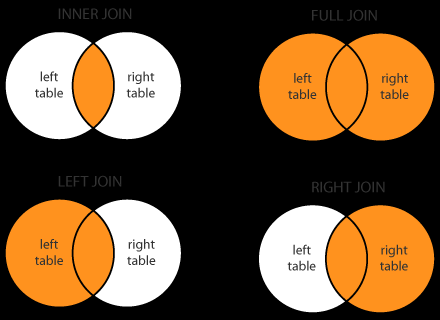

In [122]:
# merge의 종류
# 두 dataframe에 공통 칼럼이 존재해야 하고, 공통 칼럼을 기준으로 병합

# A_df와 B_df를 병합하는 방식 4가지
# 1. inner merge: A_df와 B_df 모두에 존재하는 데이터(row)들로만 합하는 방식
# 2. outer merge: A_df와 B_df 어느 한 곳에 존재하는 데이터는 모두 포함해서 합하는 방식
# 3. right merge: B_df의 데이터를 모두 포함. A_df에서 B_df에 존재하는 데이터만 포함
# 4. left merge: A_df의 데이터를 모두 포함. B_df에서 A_df에 존재하는 데이터만 포함
    

In [126]:
raw_data = {
    'subject_id' : ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
    'test_score' : [51, 15, 15, 61, 16, 14, 15, 15, 16, 61]
}

df_a = pd.DataFrame(raw_data)
df_a

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,15
8,10,16
9,11,61


In [127]:
raw_data = {
    'subject_id' : ['4', '5', '6', '7', '8'],
    'first_name' : ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
    'last_name' : ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']
}

df_b = pd.DataFrame(raw_data)
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [131]:
df_a.subject_id.values

array(['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'], dtype=object)

In [132]:
merged_df = pd.merge(df_a, df_b, on = 'subject_id', how = 'inner')  # how = 'inner' 는 안써도 됨
merged_df

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


In [133]:
pd.merge(df_a, df_b, on = 'subject_id', how = 'outer')   # outmerge : nan값 생성 가능성 크다

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,Billy,Bonder
4,5,16.0,Brian,Black
5,7,14.0,Bryce,Brice
6,8,15.0,Betty,Btisan
7,9,15.0,NaN,NaN
8,10,16.0,NaN,NaN
9,11,61.0,NaN,NaN


In [134]:
pd.merge(df_a, df_b, on = 'subject_id', how = 'right')

,subject_id,test_score,first_name,last_name
0,4,61.0,Billy,Bonder
1,5,16.0,Brian,Black
2,6,NaN,Bran,Balwner
3,7,14.0,Bryce,Brice
4,8,15.0,Betty,Btisan


In [135]:
pd.merge(df_a, df_b, on = 'subject_id', how = 'left')

,subject_id,test_score,first_name,last_name
0,1,51,NaN,NaN
1,2,15,NaN,NaN
2,3,15,NaN,NaN
3,4,61,Billy,Bonder
4,5,16,Brian,Black
5,7,14,Bryce,Brice
6,8,15,Betty,Btisan
7,9,15,NaN,NaN
8,10,16,NaN,NaN
9,11,61,NaN,NaN


In [150]:
person = pd.read_csv('./data/survey_person.csv')
site = pd.read_csv('./data/survey_site.csv')
survey = pd.read_csv('./data/survey_survey.csv')
visited = pd.read_csv('./data/survey_visited.csv')

In [151]:
person.head(1)

,ident,personal,family
0,dyer,William,Dyer


In [152]:
site.head()

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [153]:
survey.head(1)

,taken,person,quant,reading
0,619,dyer,rad,9.82


In [154]:
visited.head(1)

,ident,site,dated
0,619,DR-1,1927-02-08


In [155]:
# site, visited을 inner merge

In [156]:
pd.merge(site, visited, left_on = 'name', right_on = 'site', how = 'inner')

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,NaN
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [157]:
# person, survey를 inner merge 하기

pd.merge(person, survey, left_on = 'ident', right_on = 'person', how = 'inner')

,ident,personal,family,taken,person,quant,reading
0,dyer,William,Dyer,619,dyer,rad,9.82
1,dyer,William,Dyer,619,dyer,sal,0.13
2,dyer,William,Dyer,622,dyer,rad,7.80
3,dyer,William,Dyer,622,dyer,sal,0.09
4,pb,Frank,Pabodie,734,pb,rad,8.41
5,pb,Frank,Pabodie,734,pb,temp,-21.50
6,pb,Frank,Pabodie,735,pb,rad,7.22
7,pb,Frank,Pabodie,751,pb,rad,4.35
8,pb,Frank,Pabodie,751,pb,temp,-18.50
9,lake,Anderson,Lake,734,lake,sal,0.05


### concat
  - 두 개 이상의 dataframe을 물리적으로 full로 붙인다

In [158]:
raw_data = {
    'subject_id' : ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
    'test_score' : [51, 15, 15, 61, 16, 14, 15, 15, 16, 61]
}

df_a = pd.DataFrame(raw_data)
df_a

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,15
8,10,16
9,11,61


In [159]:
raw_data = {
    'subject_id' : ['4', '5', '6', '7', '8'],
    'first_name' : ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
    'last_name' : ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']
}

df_b = pd.DataFrame(raw_data)
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [160]:
pd.concat([df_a, df_b])

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,NaN,NaN
4,5,16.0,NaN,NaN
5,7,14.0,NaN,NaN
6,8,15.0,NaN,NaN
7,9,15.0,NaN,NaN
8,10,16.0,NaN,NaN
9,11,61.0,NaN,NaN


In [161]:
pd.concat([df_a, df_b], axis = 1)

,subject_id,test_score,subject_id,first_name,last_name
0,1,51,4,Billy,Bonder
1,2,15,5,Brian,Black
2,3,15,6,Bran,Balwner
3,4,61,7,Bryce,Brice
4,5,16,8,Betty,Btisan
5,7,14,NaN,NaN,NaN
6,8,15,NaN,NaN,NaN
7,9,15,NaN,NaN,NaN
8,10,16,NaN,NaN,NaN
9,11,61,NaN,NaN,NaN


### sort

In [164]:
df = pd.read_csv('./data/Ecommerce Purchases')
df.head(5)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [1]:
######################